

# Data Cleaning and Visualization

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
### BEGIN SOLUTION
# estimated size of the download (based on metadata information from the site) = 2.275 GB

# please explain how you reached the answer
# FIRST, Calculate the size of one row, Find out datatypes across the row, and assume size per data type
# We have 10 numbers, 3 dates, 21 texts, and 1 location
# Let's say datatype is 10 bytes
# Row size = (10 * 10) + (3 * 10) + (21 * Text) + (1 * 10)
# Row size = 350 bytes

# SECOND, Multiply row size by number of rows (6.98M)
# Total size = (number of rows) * (row size)
# Total size = (6.98M) * (350 bytes)
# Total size = 2,443,000,000 bytes
# Total Size = 2.27 GB


### END SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [3]:
import utils
# data_dir = 'data'
# data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

# file_name = 'NYPD_Complaint_Data_Historic.csv'

# # To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
# dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
# print(f'Located at {dest_path}')

### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.


In [4]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
size = os.path.getsize("data/NYPD_Complaint_Data_Historic.csv")
print(size)


#### END SOLUTION

2218483345


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [5]:
# Using utils library, find the number of lines in the file

### BEGIN SOLUTION
lines = utils.line_count('data/NYPD_Complaint_Data_Historic.csv')
lines
### END SOLUTION

6983208

In [9]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### BEGIN SOLUTION
file = open('data/NYPD_Complaint_Data_Historic.csv', 'r').readlines()
filename = 'NYPD_Complaint_Data_Historic_'
num = 1
for i in range(len(file)):
    if i % 698321 == 0:
        open(filename + str(num) + '.csv', 'w+').writelines(file[i:i+698321])
        num += 1


### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [7]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_10.csv',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [8]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '325341655,02/11/2015,15:00:00,,,73,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749,VIOLATION OF ORDER OF PROTECTI,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,,TILDEN,405,1009656,181287,25-44,BLACK,M,,40.664239422,-73.908425011,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,,<18,BLACK,M\n',
 '393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0,NA,,NA,1014035,174133,,,,,40.644589618,-73.892672426,"

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION

* CMPLNT_NUM : Unique ID for each call
* CMPLNT_FR_DT: Date when the incident happened.
* CMPLNT_FR_TM: Time when the incident happened.
* CMPLNT_TO_DT: Estiamted date when the incident stopped occuring. 
* CMPLNT_TO_TM: Estimated time when the incident stopped occuring. 
* ADDR_PCT_CD: The district, city or town where the incident happened.
* RPT_DT: Reported date to the Police Department when the incident occured.
* KY_CD: Three digit classification code that's used to split different crime categories
* OFNS_DESC: Basic description of what type of crime happened.
* PD_CD: Confidential in-police departmental use only to identify different crimes
* CRM_ATPT_CPTD_CD: Describes whether the crime was completed, attempted or interrupted prematurely. 'COMPLETED', ' * * ATTEMPTED', etc.
* LAW_CAT_CD: Level of offense - simple violation, felony, .... , etc.
* BORO_NM: Name of the borough where the incident occured.
* LOC_OF_OCCUR_DESC: Specific location of where it happened.
* PREM_TYP_DESC: Specific location type where it happened-- school, residential, street, ... , etc. 
* JURIS_DESC: Simple description of the Jurisdiction - housing police, polict dept? 
* JURISDICTION_CODE: Under what jurisdiction does this crime fall by using the jurisdiction code. 
* PARKS_NM: Name of NYC park, greenspace, or place where it happened, only IF APPLICABLE.
* HADEVELOPT: Name of community/housing development around where the incident happened
* HOUSING_PSA: development code. internal use only. 
* X_COORD_CD: GPS coordinates (X axis) stored in NYPD coordinate system palates
* Y_COORD_CD: GPS coordinates (Y axis) stored in NYPD coordinate system palates
* SUSP_AGE_GROUP: What age group did the suspect fall under - <18, 18-24, UNKNOWN, ... ,  etc.
* SUSP_RACE: Race of the suspect -- asian, white, ... , etc.
* SUSP_SEX: Male or Female
* TRANSIT_DISTRICT: Transit district number where the incident occured.
* Latitude: Global coordinate system. Midblock Latitude. 
* Longitude: Global coordinate system. Midblock Longitide.
* PATROL_BORO: Name of the patrol borough
* STATION_NAME: Transit Station Name
* VIC_AGE_GROUP: What age group did the victim fall under? <18, 18-24, UNKNOWN, ... , etc.
* VIC_RACE: Was the victim asian,white, black, .. , etc.
* VIC_SEX: Victime sex orientation


##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [8]:
### BEGIN SOLUTION
import pandas as pd
import time

start_time = time.time()
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv")
stop_time = time.time()

totaltime = stop_time - start_time

print(totaltime)


### END SOLUTION

/Users/rushi/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


3.4504849910736084


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [9]:
### BEGIN SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
# Columns to be removed:
# PARKS_NM
# HADEVELOPT 
# HOUSING_PSA
# SUSP_AGE_GROUP
# SUSP_RACE
# SUSP_SEX 
# TRANSIT_DISTRICT
# STATION_NAME 

### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698320 entries, 0 to 698319
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         698320 non-null  int64  
 1   CMPLNT_FR_DT       698217 non-null  object 
 2   CMPLNT_FR_TM       698310 non-null  object 
 3   CMPLNT_TO_DT       485124 non-null  object 
 4   CMPLNT_TO_TM       485769 non-null  object 
 5   ADDR_PCT_CD        697981 non-null  float64
 6   RPT_DT             698320 non-null  object 
 7   KY_CD              698320 non-null  int64  
 8   OFNS_DESC          695589 non-null  object 
 9   PD_CD              697748 non-null  float64
 10  PD_DESC            697748 non-null  object 
 11  CRM_ATPT_CPTD_CD   698317 non-null  object 
 12  LAW_CAT_CD         698320 non-null  object 
 13  BORO_NM            696639 non-null  object 
 14  LOC_OF_OCCUR_DESC  541355 non-null  object 
 15  PREM_TYP_DESC      693375 non-null  object 
 16  JU

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.983200e+05,697981.000000,698320.000000,697748.000000,697748.000000,53392.000000,6.952920e+05,6.952920e+05,14388.000000,695292.000000,695292.000000
mean,5.499528e+08,63.341648,293.182045,420.764002,0.639387,5901.545887,1.004596e+06,2.069389e+05,13.783083,40.734632,-73.926554
std,2.598946e+08,34.489549,147.789657,216.877451,6.135040,12575.698465,2.210343e+04,3.187596e+04,12.627524,0.087417,0.079712
min,1.000051e+08,1.000000,101.000000,101.000000,0.000000,5.000000,1.557610e+05,1.211310e+05,1.000000,40.498905,-76.982022
25%,3.249954e+08,40.000000,117.000000,254.000000,0.000000,489.000000,9.916220e+05,1.842090e+05,3.000000,40.672243,-73.973443
50%,5.498239e+08,63.000000,341.000000,397.000000,0.000000,721.000000,1.004234e+06,2.058400e+05,11.000000,40.731663,-73.927868
75%,7.751063e+08,94.000000,351.000000,637.000000,0.000000,1233.000000,1.016506e+06,2.353720e+05,30.000000,40.812699,-73.883531
max,9.999991e+08,123.000000,881.000000,969.000000,97.000000,66563.000000,1.067298e+06,6.216843e+06,34.000000,56.974143,-73.700316


### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [10]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from?
    # 5
# 2. How many age groups are represented in the data set?
    # 55
# 3. How many boroughs are included in the data set?
    # 5
# 4. How many offense types are listed in this data set?
    # 63

### END SOLUTION

CMPLNT_NUM           698320
CMPLNT_FR_DT           5594
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           4860
CMPLNT_TO_TM           1441
ADDR_PCT_CD              77
RPT_DT                 4427
KY_CD                    71
OFNS_DESC                63
PD_CD                   377
PD_DESC                 367
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            71
JURIS_DESC               23
JURISDICTION_CODE        23
PARKS_NM                 97
HADEVELOPT              268
HOUSING_PSA            2030
X_COORD_CD            55981
Y_COORD_CD            59138
SUSP_AGE_GROUP           20
SUSP_RACE                 8
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude              83911
Longitude             83910
Lat_Lon               83920
PATROL_BORO               8
STATION_NAME            367
VIC_AGE_GROUP            55
VIC_RACE                  8
VIC_SEX                   5
dtype: int64

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [11]:
### BEGIN SOLUTION

calls_by_Boro_and_offense = calls.groupby(["BORO_NM"])['OFNS_DESC'].value_counts().to_frame()


calls_by_Boro_and_offense.rename(columns = {'OFNS_DESC':'Count'}, inplace = True)
calls_by_Boro_and_offense

### END SOLUTION

Count
BORO_NM       OFNS_DESC                             
BRONX         DANGEROUS DRUGS                  19251
              PETIT LARCENY                    17995
              HARRASSMENT 2                    17755
              ASSAULT 3 & RELATED OFFENSES     16307
              CRIMINAL MISCHIEF & RELATED OF   14528
...                                              ...
STATEN ISLAND OTHER STATE LAWS                     2
              ESCAPE 3                             1
              GAMBLING                             1
              HOMICIDE-NEGLIGENT,UNCLASSIFIE       1
              PROSTITUTION & RELATED OFFENSES      1

[274 rows x 1 columns]

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [ ]:
### BEGIN SOLUTION


Boro = calls[calls['BORO_NM'] == 'BRONX']['OFNS_DESC'].unique()
Boro

### END SOLUTION

# How many offenses were committed in Bronx during the analysis period?
# There are total of 57 unqiue Commited offense

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [ ]:
### BEGIN SOLUTION
Topcrimes = calls[calls['BORO_NM'] == 'BRONX']['OFNS_DESC'].value_counts()
Topcrimes.head()

### END SOLUTION

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [ ]:
### BEGIN SOLUTION
ArsonCrime = calls[(calls['BORO_NM'] == 'BRONX') & (calls['OFNS_DESC'] == 'ARSON')]
Count = ArsonCrime.shape[0]
Count

TotalCrime = calls[calls['BORO_NM'] == 'BRONX']
TotalCount = TotalCrime.shape[0]
TotalCount

ArsonProb = Count/TotalCount
ArsonProb



### END SOLUTION

---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

<AxesSubplot:>

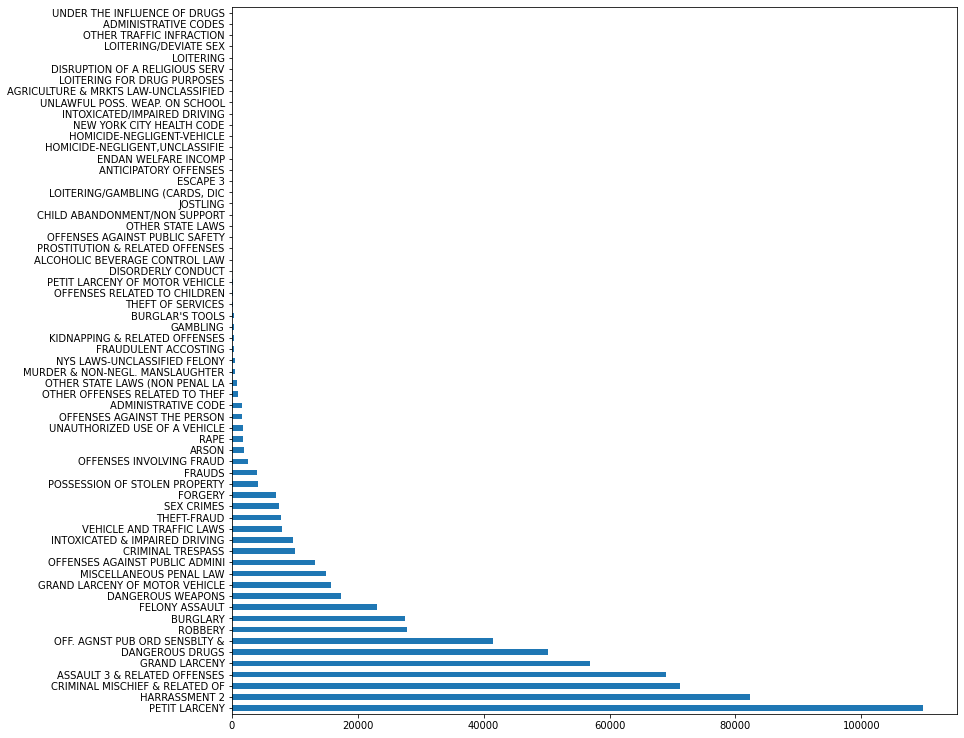

In [12]:
### BEGIN SOLUTION
offensive = calls["OFNS_DESC"].value_counts()
offensive.plot(kind = 'barh', figsize=(13,13))

### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

<AxesSubplot:>

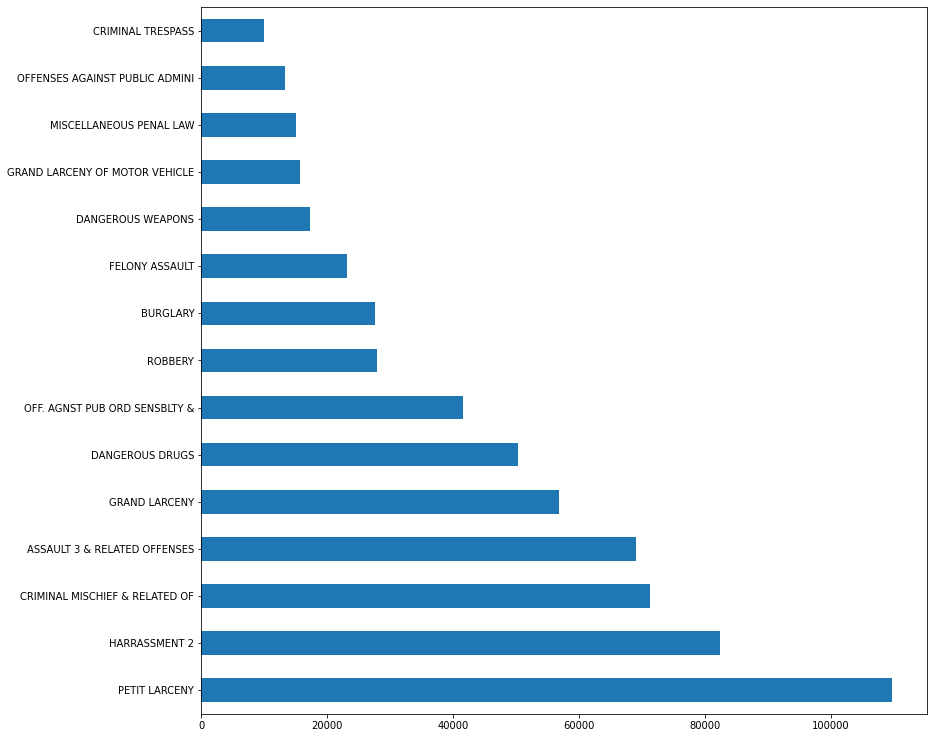

In [13]:
### BEGIN SOLUTION
Plot = offensive[offensive > 10000]
Plot.plot(kind = 'barh', figsize=(13,13))
### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0.5, 1.0, 'Number of Calls By Crime Type')

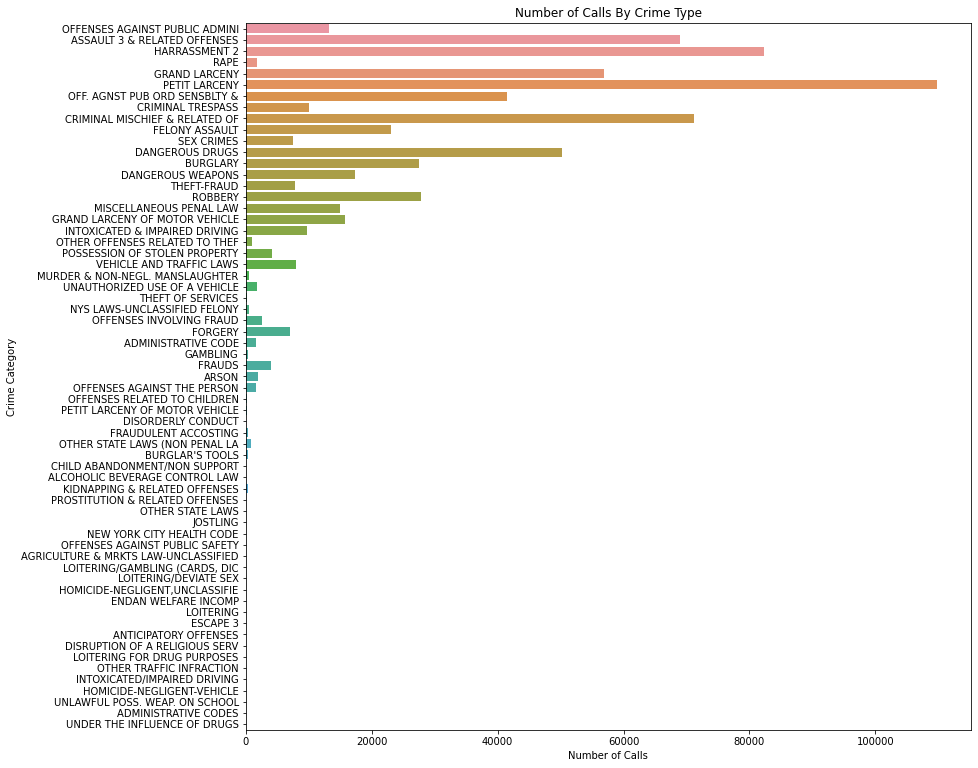

In [14]:
### BEGIN SOLUTION
plt.figure(figsize=(13,13))
ax = sns.countplot(y = "OFNS_DESC", data = calls)
ax.set_xlabel('Number of Calls')
ax.set_ylabel('Crime Category')
ax.set_title('Number of Calls By Crime Type')


### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

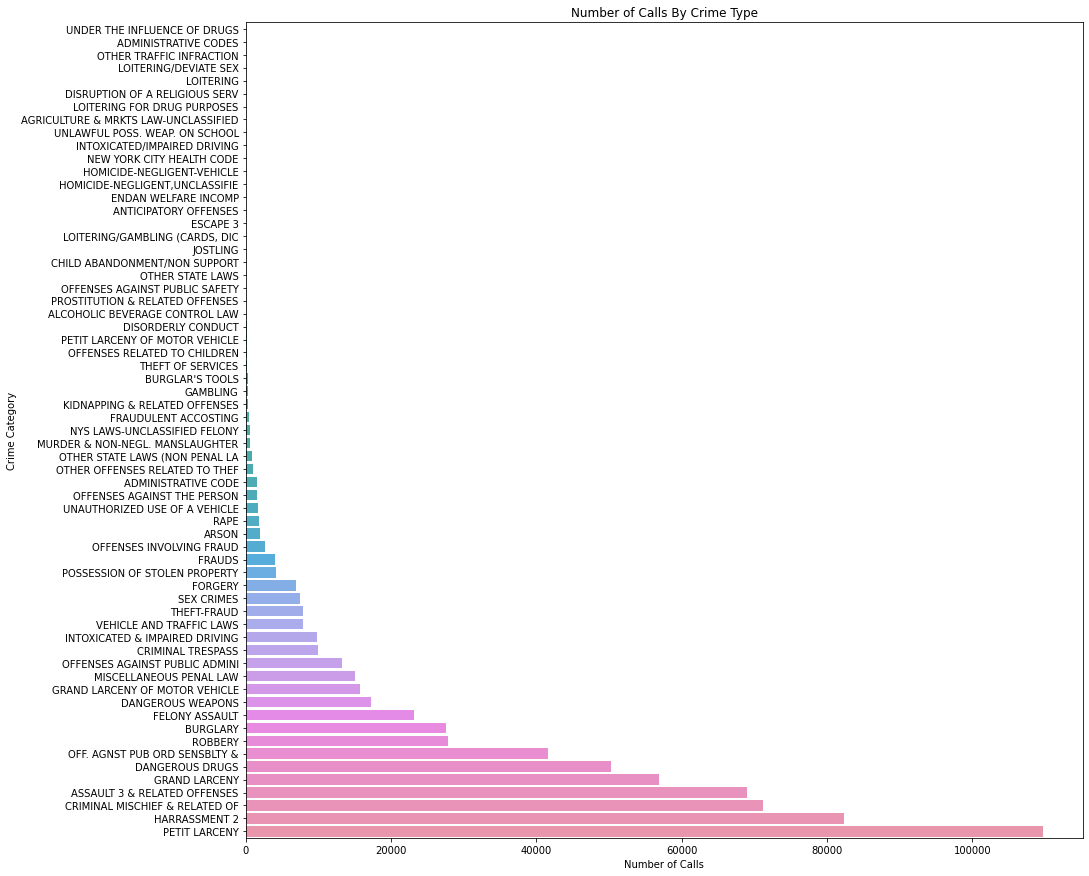

In [16]:
### BEGIN SOLUTION
plt.figure(figsize=(15,15))
ax = sns.countplot(y = "OFNS_DESC", data = calls, order = reversed(offensive.keys()))
ax.set_xlabel('Number of Calls')
ax.set_ylabel('Crime Category')
ax.set_title('Number of Calls By Crime Type')

### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [17]:
### BEGIN SOLUTION
import datetime
import calendar

# ### BEGIN SOLUTION
def findDay(date):
   
  if(pd.isnull(date)):
     return
  new_date = str(date)
 
  DayofCrime = datetime.datetime.strptime(new_date, '%m/%d/%Y').weekday()
  return (calendar.day_name[DayofCrime])

#print(findDay(calls.loc[0,"CMPLNT_FR_DT"]))

calls['DAY_OF_WEEK'] = [findDay(calls.loc[i,"CMPLNT_FR_DT"]) for i in range(calls.shape[0])]
calls['DAY_OF_WEEK']


0         Wednesday
1          Saturday
2          Thursday
3          Thursday
4         Wednesday
            ...    
698315       Sunday
698316       Sunday
698317       Monday
698318     Saturday
698319     Saturday
Name: DAY_OF_WEEK, Length: 698320, dtype: object

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

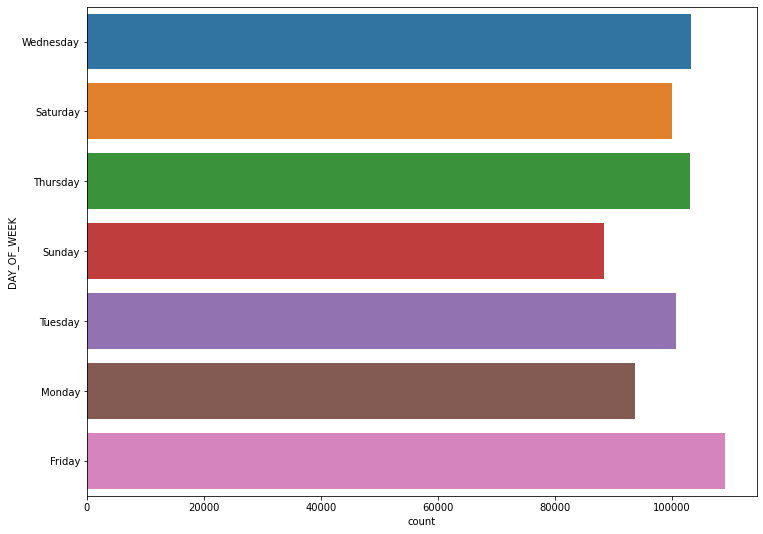

In [18]:
### BEGIN SOLUTION


ax = sns.countplot(y = "DAY_OF_WEEK", data = calls)
### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

<AxesSubplot:>

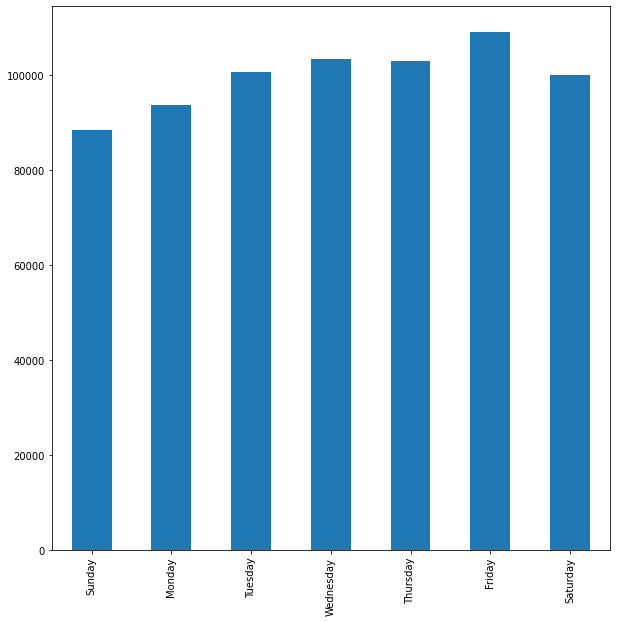

In [19]:
### BEGIN SOLUTION
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
call_by_week = calls['DAY_OF_WEEK'].value_counts()



call_by_week[days].plot(kind = 'bar', figsize=(10,10))

### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION
It is true that weekdays have more crimes than sundays. weekday crime rate is similar to the number of crimes that happens on saturdays. The difference is too large between saturdays and weekdays.

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

Text(0.5, 1.0, 'Number of Calls by Harrassment per day')

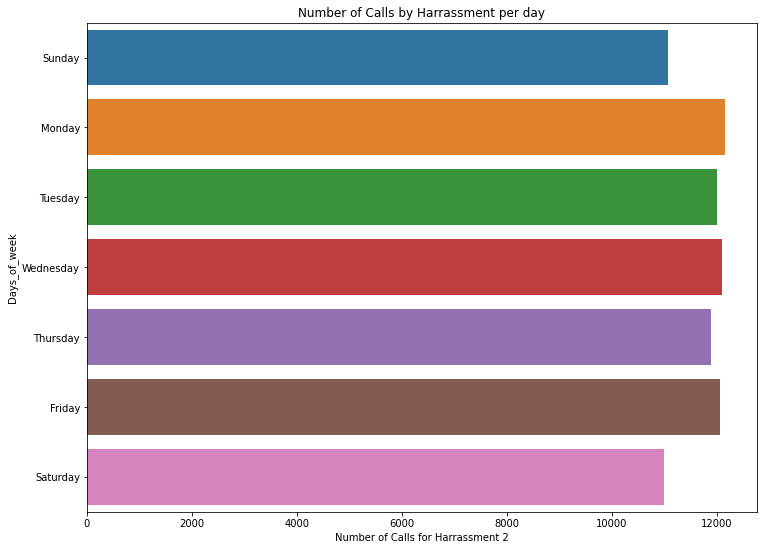

In [20]:
### BEGIN SOLUTION

Noise_Vio = calls[calls['OFNS_DESC'] == 'HARRASSMENT 2']

ax = sns.countplot(y = "DAY_OF_WEEK", data = Noise_Vio, order = days)
ax.set_xlabel('Number of Calls for Harrassment 2')
ax.set_ylabel('Days_of_week')
ax.set_title('Number of Calls by Harrassment per day')


### END SOLUTION

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION
Distribution of HARRASSMENT 2  is pretty even and it looks like that it happens evenly over all days of the week.
##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

Text(0.5, 1.0, 'Number of Calls by BURGLARY per day')

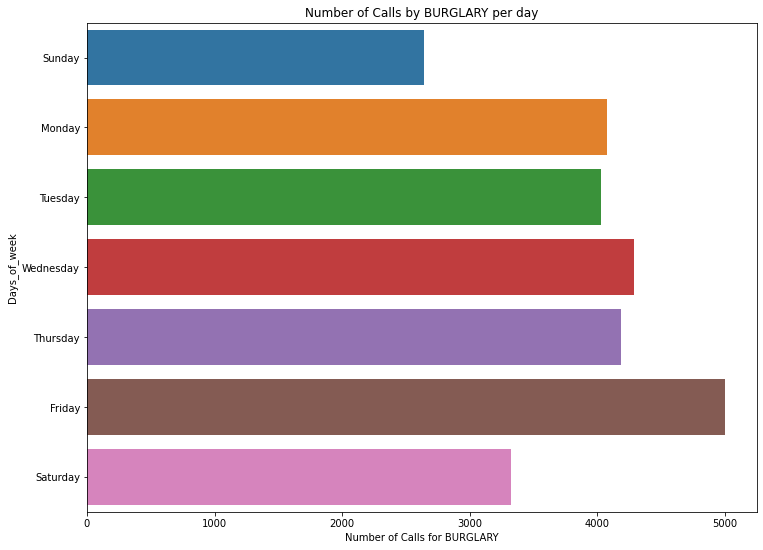

In [21]:
### BEGIN SOLUTION
Burglary = calls[calls['OFNS_DESC'] == 'BURGLARY']
ax = sns.countplot(y = "DAY_OF_WEEK", data = Burglary, order = days)
ax.set_xlabel('Number of Calls for BURGLARY')
ax.set_ylabel('Days_of_week')
ax.set_title('Number of Calls by BURGLARY per day')


### END SOLUTION



### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

<AxesSubplot:xlabel='count', ylabel='Hour'>

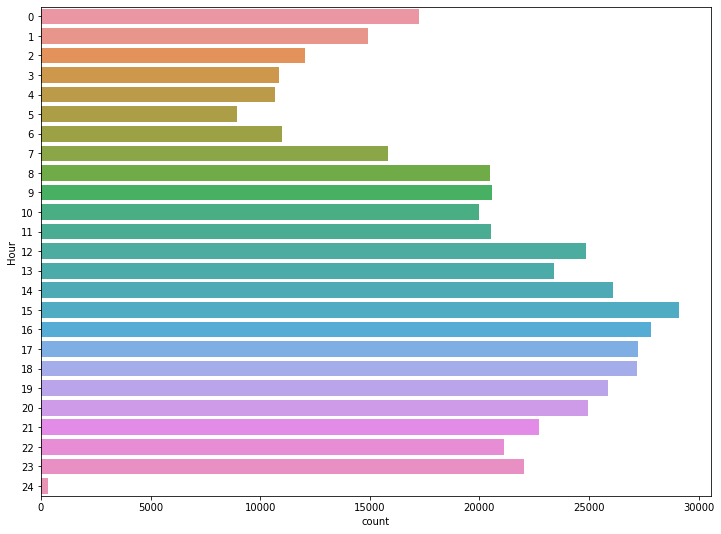

In [22]:
### BEGIN SOLUTION

calls['Hour'] = calls["CMPLNT_TO_TM"].str.slice(0,2)
calls1 = calls['Hour'].dropna().astype(int).reset_index()

sns.countplot(y = 'Hour', data = calls1)



### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

Text(0.5, 1.0, 'Number of Calls Reporting Fraud For Each Day of the Week')

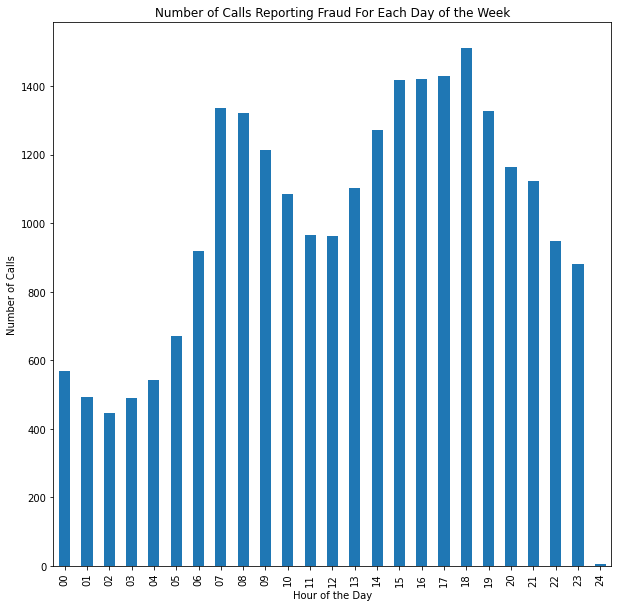

In [24]:
### BEGIN SOLUTION
Burglaryhour = calls[calls['OFNS_DESC'] == 'BURGLARY']

count = Burglaryhour['Hour'].value_counts()
count_final = count.sort_index()
count_final
ax = count_final.plot(kind = 'bar', figsize=(10,10))
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week")

### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

<AxesSubplot:xlabel='count', ylabel='Hour'>

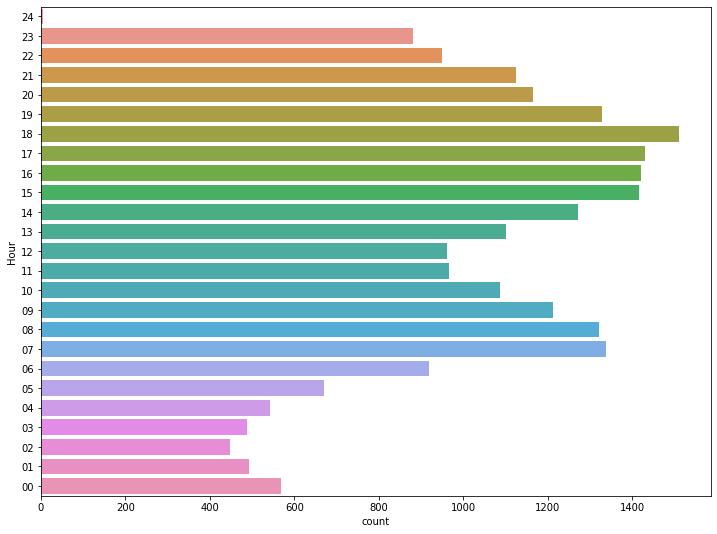

In [25]:
### BEGIN SOLUTION
sns.countplot(y = 'Hour', data = Burglaryhour, order = reversed(count_final.keys()))
### END SOLUTION

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION
It looks like there is a spike between 7 and 18 hours and this is possibly a legit spike. But We can also say that burglary is likely to happen more at night but this data shows otherwise.

#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

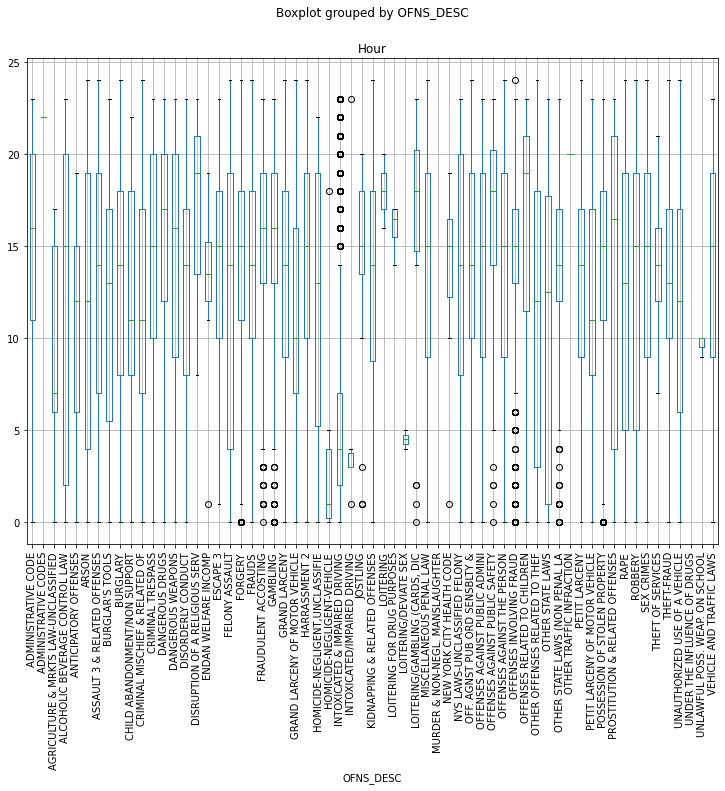

In [26]:
calls['Hour'] = calls['Hour'].dropna().astype(int)
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.
answer = 'Prostitution and Related Offenses'

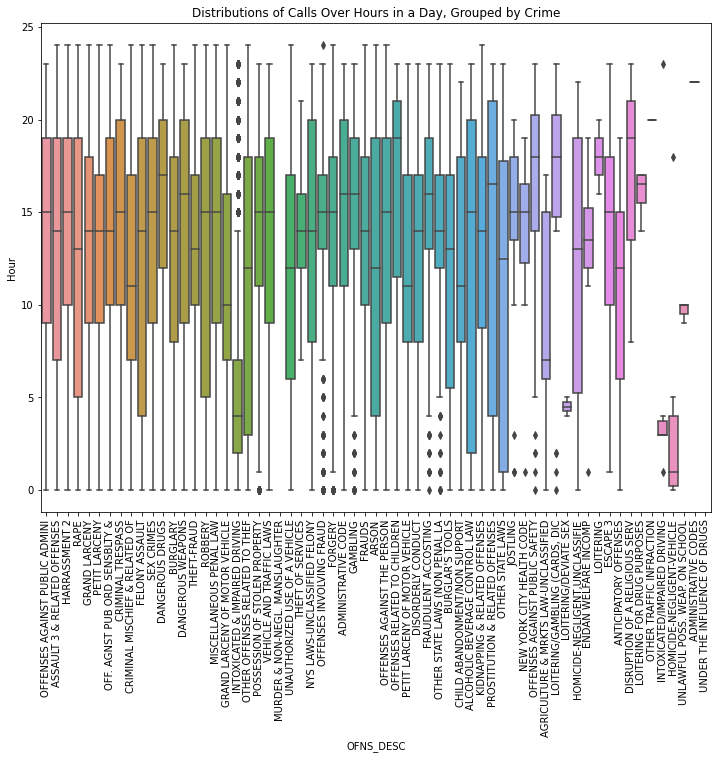

In [27]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = sns.boxplot(x = 'OFNS_DESC', y = 'Hour', data = calls, )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "Your Answer here"
### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [ ]:
!pip install --upgrade folium

In [ ]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

### BEGIN SOLUTION
import folium # goelogical map
map_final = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
 zoom_start=12)

Plot = Burglary[['Latitude','Longitude']].dropna()
for index, r in  Plot.iterrows():
   
    folium.CircleMarker([r['Latitude'],r['Longitude']],
                       radius=0.5,
                       color='blue',
                       fill_color='#FD8A6C',
                       popup=str(r['Latitude'])+','+str(r['Longitude']),
                       ).add_to(map_final)
map_final
### END SOLUTION

## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please remove all output from your notebook prior to submission<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2020 A.D. Gunawardena. Many people contributed to this lab including Liqin Long. Many credits go to Josh Hug, and Berkeley Data Science Group for their contributions to the original version.